In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('data/dataset/sp500selected_6mon.csv')
dataset.tail()

,date,return,volume,EMA_9,EMA_12,EMA_26,MACD,BB_LOW,BB_UP,VWAP,...,FRL_0,FRL_1,FRL_2,FRL_3,FRL_4,RSI_7,RSI_14,RSI_28,Oscillator_K,Oscillator_D
6450548,2025-02-28 20:56:00+00:00,-0.707711,0.979303,0.315841,0.301367,0.262045,0.006111,-1.921935,2.450627,-0.083359,...,-1.254188,-0.535665,0.04506,0.625784,1.344307,0.566667,0.666667,0.669528,0.765625,0.879653
6450549,2025-02-28 20:57:00+00:00,-0.107309,0.834523,0.231211,0.238494,0.234686,-0.024956,-1.948241,2.436738,-0.083374,...,-1.254188,-0.535665,0.04506,0.625784,1.344307,0.637500,0.625000,0.651786,0.750000,0.816319
6450550,2025-02-28 20:58:00+00:00,0.389406,1.573234,0.262850,0.261711,0.246147,-0.011994,-1.933149,2.451247,-0.083344,...,-1.254188,-0.535665,0.04506,0.625784,1.344307,0.670571,0.627792,0.669584,0.811875,0.775833
6450551,2025-02-28 20:59:00+00:00,-1.204509,2.233023,-0.030622,0.036139,0.138691,-0.105522,-2.111174,2.429083,-0.083556,...,-1.254188,-0.535665,0.04506,0.625784,1.344307,0.733582,0.558858,0.632524,0.625000,0.728958
6450552,2025-02-28 21:00:00+00:00,-0.007171,31.148451,-0.025932,0.029476,0.127886,-0.082539,-2.123574,2.330933,-0.083774,...,-1.254188,-0.535665,0.04506,0.625784,1.344307,0.600160,0.540255,0.632524,0.625000,0.687292


In [3]:
dataset['date'] =  pd.to_datetime(dataset['date'])
dataset['date']

0         2024-09-03 14:30:00+00:00
1         2024-09-03 14:31:00+00:00
2         2024-09-03 14:32:00+00:00
3         2024-09-03 14:33:00+00:00
4         2024-09-03 14:34:00+00:00
                     ...           
6450548   2025-02-28 20:56:00+00:00
6450549   2025-02-28 20:57:00+00:00
6450550   2025-02-28 20:58:00+00:00
6450551   2025-02-28 20:59:00+00:00
6450552   2025-02-28 21:00:00+00:00
Name: date, Length: 6450553, dtype: datetime64[ns, UTC]

In [4]:
dataset['should_buy'] = (dataset['return'].shift(-1) > 0).astype(int)
dataset['should_buy'] = dataset['should_buy'].fillna(0)
dataset['should_buy'] = dataset['should_buy'].astype(np.float32)
dataset[['return', 'should_buy']].head()

,return,should_buy
0,0.000000,0.0
1,-2.591485,0.0
2,-0.917648,1.0
3,1.227802,0.0
4,-0.130563,0.0


In [5]:
dataset['should_buy'].mean()

np.float32(0.4981841)

In [6]:
dataset.columns

Index(['date', 'return', 'volume', 'EMA_9', 'EMA_12', 'EMA_26', 'MACD',
       'BB_LOW', 'BB_UP', 'VWAP', 'ATR_14', 'ATR_28', 'FRL_0', 'FRL_1',
       'FRL_2', 'FRL_3', 'FRL_4', 'RSI_7', 'RSI_14', 'RSI_28', 'Oscillator_K',
       'Oscillator_D', 'should_buy'],
      dtype='object')

In [ ]:
dataset.to_csv('data/dataset/sp500selected_6mon_2class.csv')

In [7]:
train_df = dataset[dataset['date'].apply(lambda date: date.month != 2)]
test_df = dataset[dataset['date'].apply(lambda date: date.month == 2)]

In [9]:
def get_x_y(df): 
    return df.drop(['date', 'should_buy'], axis=1).to_numpy(), df['should_buy'].to_numpy()

X_train, y_train = get_x_y(train_df)
X_test, y_test = get_x_y(test_df)

In [10]:
len(train_df), len(test_df)

(5397550, 1053003)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5397550, 21), (5397550,), (1053003, 21), (1053003,))

In [12]:
model = lgb.LGBMClassifier(
  n_estimators=1000,
  learning_rate=0.01,
  max_depth=15,
  num_leaves=2**5-1,
)

# model = lgb.LGBMClassifier(
#   n_estimators=20000,
#   learning_rate=0.001,
#   max_depth=10,
#   num_leaves=2**6,
#   colsample_bytree=0.1,
# )

In [13]:
model = model.fit(X_train, y_train)

c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2683764, number of negative: 2713786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.348694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 5397550, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497219 -> initscore=-0.011124
[LightGBM] [Info] Start training from score -0.011124


In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

def calc_metrics(true_preds, test_preds): 
    precision = precision_score(true_preds, test_preds)
    print(f'  Accuracy Score: {accuracy_score(true_preds, test_preds)}')    
    print(f'  F1 Score: {f1_score(true_preds, test_preds)}')
    print(f'  Precision Score: {precision}')
    print(f'  Recall Score: {recall_score(true_preds, test_preds)}')
    print(f'  Confusion Matrix:\n {confusion_matrix(true_preds, test_preds)}')
    return precision


# print('TRAIN RESULTS')
# train_preds = model.predict(X_train)
# calc_metrics(y_train, train_preds )

print('TEST RESULTS')

print('\nThreshold configuration')
max_precision = 0
test_preds_proba = model.predict_proba(X_test)


TEST RESULTS

Threshold configuration


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [15]:
for treshold in np.array(list(range(45, 65))) / 100:
    print(f'TEST RESULTS FOR TRESHOLD: {treshold}')
    test_preds = (test_preds_proba[:, 1] >= treshold).astype(int)
    precision = calc_metrics(y_test, test_preds)

    if precision > max_precision: 
        max_precision = precision
        # with open('best_predictions.pkl', 'wb') as ouf: 
        #    pickle.dump(test_preds, ouf)

TEST RESULTS FOR TRESHOLD: 0.45
  Accuracy Score: 0.5155626337246902
  F1 Score: 0.6596503588885464
  Precision Score: 0.5101574311528956
  Recall Score: 0.9330708438483274
  Confusion Matrix:
 [[ 48549 474655]
 [ 35459 494340]]
TEST RESULTS FOR TRESHOLD: 0.46
  Accuracy Score: 0.518065950429391
  F1 Score: 0.6537872203400469
  Precision Score: 0.5119236238500254
  Recall Score: 0.904418468136029
  Confusion Matrix:
 [[ 66365 456839]
 [ 50639 479160]]
TEST RESULTS FOR TRESHOLD: 0.47
  Accuracy Score: 0.5211542607191053
  F1 Score: 0.6425125773499935
  Precision Score: 0.51451900989357
  Recall Score: 0.8552734150121084
  Confusion Matrix:
 [[ 95654 427550]
 [ 76676 453123]]
TEST RESULTS FOR TRESHOLD: 0.48
  Accuracy Score: 0.525500877015545
  F1 Score: 0.6187285431837622
  Precision Score: 0.5193100391708788
  Recall Score: 0.7652260574293269
  Confusion Matrix:
 [[147938 375266]
 [124383 405416]]
TEST RESULTS FOR TRESHOLD: 0.49
  Accuracy Score: 0.5280706702639973
  F1 Score: 0.572578

In [90]:
from collections import defaultdict

def calc_preds_to_probabilities(test_preds_proba, y_test): 
    preds_to_trues = defaultdict(list) 
    for pred, true in zip(test_preds_proba, y_test): 
        pred_trimed = int(pred[1] * 100) / 100
        preds_to_trues[pred_trimed].append(true)

    preds_to_probabilities = {}
    for pred, trues in preds_to_trues.items(): 
        preds_to_probabilities[pred] = np.array(trues).mean()

    return dict(sorted(preds_to_probabilities.items()))

In [91]:
preds_to_probabilities = calc_preds_to_probabilities(test_preds_proba, y_test)

In [92]:
preds_to_probabilities

{0.22: np.float32(0.25),
 0.23: np.float32(0.0),
 0.24: np.float32(0.16666667),
 0.25: np.float32(0.125),
 0.26: np.float32(0.31578946),
 0.27: np.float32(0.44444445),
 0.28: np.float32(0.25454545),
 0.29: np.float32(0.37096775),
 0.3: np.float32(0.3271028),
 0.31: np.float32(0.27407408),
 0.32: np.float32(0.2862191),
 0.33: np.float32(0.31578946),
 0.34: np.float32(0.31666666),
 0.35: np.float32(0.33161512),
 0.36: np.float32(0.32875928),
 0.37: np.float32(0.3483977),
 0.38: np.float32(0.36396936),
 0.39: np.float32(0.3926151),
 0.4: np.float32(0.40432733),
 0.41: np.float32(0.42265567),
 0.42: np.float32(0.42757812),
 0.43: np.float32(0.44322124),
 0.44: np.float32(0.44971415),
 0.45: np.float32(0.46005577),
 0.46: np.float32(0.47061056),
 0.47: np.float32(0.47711295),
 0.48: np.float32(0.49084747),
 0.49: np.float32(0.5010596),
 0.5: np.float32(0.50796616),
 0.51: np.float32(0.5199187),
 0.52: np.float32(0.5332842),
 0.53: np.float32(0.53960633),
 0.54: np.float32(0.5501431),
 0.55:

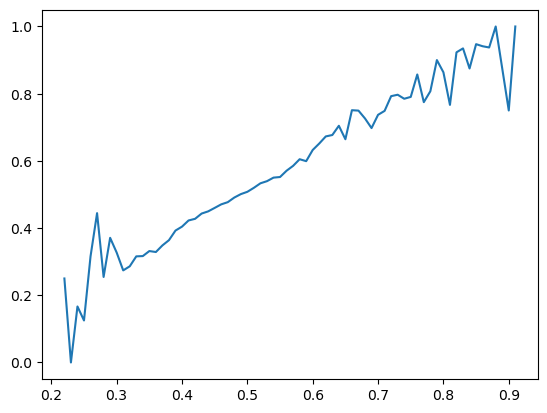

In [93]:
import matplotlib.pyplot as plt

preds = list(preds_to_probabilities.keys())
probabilities = list(preds_to_probabilities.values())
plt.plot(preds, probabilities)

In [94]:
for pred, proba in zip(preds, probabilities): 
    print(pred, proba)

0.22 0.25
0.23 0.0
0.24 0.16666667
0.25 0.125
0.26 0.31578946
0.27 0.44444445
0.28 0.25454545
0.29 0.37096775
0.3 0.3271028
0.31 0.27407408
0.32 0.2862191
0.33 0.31578946
0.34 0.31666666
0.35 0.33161512
0.36 0.32875928
0.37 0.3483977
0.38 0.36396936
0.39 0.3926151
0.4 0.40432733
0.41 0.42265567
0.42 0.42757812
0.43 0.44322124
0.44 0.44971415
0.45 0.46005577
0.46 0.47061056
0.47 0.47711295
0.48 0.49084747
0.49 0.5010596
0.5 0.50796616
0.51 0.5199187
0.52 0.5332842
0.53 0.53960633
0.54 0.5501431
0.55 0.55197155
0.56 0.57071364
0.57 0.58522457
0.58 0.60493964
0.59 0.5991529
0.6 0.63246816
0.61 0.6516672
0.62 0.6727925
0.63 0.67697597
0.64 0.7044745
0.65 0.66441137
0.66 0.7508091
0.67 0.7495908
0.68 0.72623575
0.69 0.6976127
0.7 0.7371007
0.71 0.74880385
0.72 0.7925926
0.73 0.796875
0.74 0.78488374
0.75 0.790393
0.76 0.85714287
0.77 0.7747748
0.78 0.8072289
0.79 0.9
0.8 0.8636364
0.81 0.76666665
0.82 0.9230769
0.83 0.9347826
0.84 0.875
0.85 0.94736844
0.86 0.9411765
0.87 0.9375
0.88 1.0
0.

In [98]:
lower_treshold = 0.3
upper_treshold = 0.63

for pred in np.arange(0.01, 1.0, 0.01): 
    pred = int(100 * float(pred)) / 100
    if pred > upper_treshold: 
        preds_to_probabilities[pred] = float(preds_to_probabilities[upper_treshold] + 0.01)
    elif pred < lower_treshold: 
        preds_to_probabilities[pred] = float(preds_to_probabilities[lower_treshold] - 0.01)
    else: 
        preds_to_probabilities[pred] = float(preds_to_probabilities[pred])
        

In [99]:
preds_to_probabilities

{0.22: 0.31710281014442443,
 0.23: 0.31710281014442443,
 0.24: 0.31710281014442443,
 0.25: 0.31710281014442443,
 0.26: 0.31710281014442443,
 0.27: 0.31710281014442443,
 0.28: 0.31710281014442443,
 0.29: 0.31710281014442443,
 0.3: 0.32710281014442444,
 0.31: 0.27407407760620117,
 0.32: 0.2862190902233124,
 0.33: 0.31578946113586426,
 0.34: 0.3166666626930237,
 0.35: 0.3316151201725006,
 0.36: 0.3287592828273773,
 0.37: 0.34839770197868347,
 0.38: 0.3639693558216095,
 0.39: 0.39261510968208313,
 0.4: 0.4043273329734802,
 0.41: 0.4226556718349457,
 0.42: 0.4275781214237213,
 0.43: 0.44322124123573303,
 0.44: 0.44971415400505066,
 0.45: 0.46005576848983765,
 0.46: 0.4706105589866638,
 0.47: 0.47711294889450073,
 0.48: 0.49084746837615967,
 0.49: 0.5010595917701721,
 0.5: 0.507966160774231,
 0.51: 0.51991868019104,
 0.52: 0.5332841873168945,
 0.53: 0.5396063327789307,
 0.54: 0.5501431226730347,
 0.55: 0.5519715547561646,
 0.56: 0.5707136392593384,
 0.57: 0.5852245688438416,
 0.58: 0.6049396

In [100]:
import json 
with open('models/preds_to_probabilities.json', 'w') as json_file:
    json.dump(preds_to_probabilities, json_file, indent=4)

In [103]:
import pickle


with open('models/lgb_spx_selected_6_mon.pkl', 'wb') as file:
    pickle.dump(model, file)

# # Load the model from the file
# with open('models/lgb_spx_selected_6_mon.pkl', 'rb') as file:
#     model = pickle.load(file)

<Axes: >

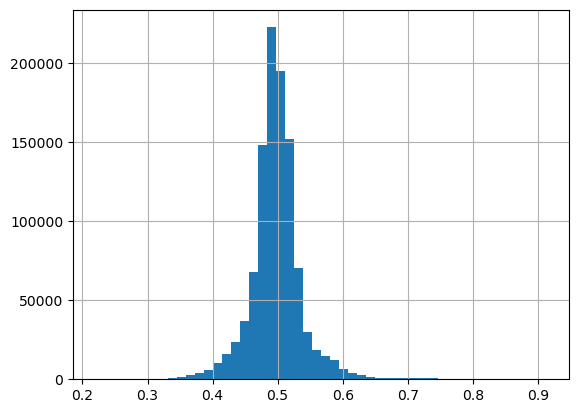

In [41]:
pd.Series(test_preds_proba[:, 1]).hist(bins=50)

In [42]:
def backtest(model):
    backtest_records = []
    for date in pd.date_range(start="2025-02-03 14:30:00+00:00", end="2025-02-28 21:00:00+00:00", freq='min'): 
        current_record = test_df[test_df['date'] == date]
        if len(current_record) > 0: 
            backtest_records.append(current_record)
    len(backtest_records)

    statistics = []
    for record in backtest_records: 
        test_input, test_target = get_x_y(record)
        prediction = model.predict_proba(test_input)[:, 1]
        bet_i = np.argmax(prediction)
        statistics.append(test_target[bet_i])
        if len(statistics) % 100 == 0: 
            print(np.array(statistics).mean())

    print(f'Final accuracy: {np.array(statistics).mean()}')

In [43]:
backtest(model)

c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.61


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.625


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.66333336


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6475


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.634


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.63


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.64428574


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.64


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.64555556


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.66


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6645455


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6616667


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.65923077


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6628571


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.66466665


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.669375


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6652941


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.66833335


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.67105263


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6675


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6690476


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.67227274


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6752174


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.67375


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.678


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6846154


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.68703705


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.68892854


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.69310343


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.694


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.69548386


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.693125


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6939394


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.69441175


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.69685715


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.69555557


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6967568


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6994737


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7005128


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70075


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.6997561


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7018605


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70022726


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7008889


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70304346


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70340425


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70479167


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7053061


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7062


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7064706


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7046154


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70660377


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70574075


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7038182


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7039286


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7047368


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70586205


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7049152


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70416665


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7065574


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7093548


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7088889


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.708125


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7073846


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70787877


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7070149


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70691174


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.70811594


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7081429


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7067606


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7063889


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7060274


c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ikurnosau\anaconda3\envs\mldl\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

0.7058108
Final accuracy: 0.7056131362915039


In [112]:
growth_probabilities = {'AMD': 0.00040665191765909287, 'AES': 0.0007700747767844826, 'ABNB': 0.0005874061163078732, 'GOOGL': 0.00023252857574761364, 'GOOG': 0.00025571409178495365, 'MO': 0.00027566834375028135, 'AMZN': 0.0005100626681018292, 'AMCR': 0.0005846412485864719, 'APH': 0.0004843242184337516, 'ADI': 0.0003609781859269978, 'APA': 0.0008688348670835704, 'APO': 0.00046807214885952913, 'AAPL': 0.0004522121339261409, 'APTV': 0.0008525628055398871, 'ADM': 0.0003132714690361806, 'ANET': 0.00045394082688903593, 'T': 0.00024164649642860215, 'BKR': 0.0005586016359380226, 'BALL': 0.00024406856798191945, 'BAC': 0.000253381944072897, 'BX': 0.0005658815518098791, 'BA': 0.0003059423034568349, 'BSX': 0.0003217771942272744, 'BMY': 0.00021531574670279518, 'AVGO': 0.0006740745550804613, 'CPB': 0.0002437703988193295, 'CCL': 0.0006050794979509616, 'CARR': 0.00043817337214396363, 'CNC': 0.00039027793992276036, 'CNP': 0.00025788092124463596, 'SCHW': 0.0003254842031609522, 'CVX': 0.0004636724301118421, 'CMG': 0.0003807658721997141, 'CSCO': 0.0002597846488361781, 'CFG': 0.0003759031847625159, 'KO': 0.0003312572722860255, 'CL': 0.0002425477582712366, 'CMCSA': 0.000265963252720872, 'COP': 0.0005786645737883966, 'CEG': 0.0006721105007529971, 'CSX': 0.00032476147876466703, 'CVS': 0.0007188282923219129, 'DHR': 0.00032504018015793476, 'DECK': 0.00037122610264614804, 'DELL': 0.0005449012491306061, 'DAL': 0.0006517007085142883, 'DVN': 0.0004946707782206742, 'D': 0.0003550459131045215, 'DOW': 0.0003060205223332173, 'EBAY': 0.0006897301453951479, 'EIX': 0.00028796660553276983, 'EA': 0.0003040397767461583, 'ENPH': 0.0008674931809242043, 'EQT': 0.0007141243179540376, 'EQR': 0.00031580550854264913, 'EL': 0.0006435302776619562, 'XOM': 0.00035231011022412615, 'FITB': 0.00035707007995945076, 'F': 0.0004947612633999042, 'FTNT': 0.0003692737379344729, 'FOXA': 0.00036210567071357164, 'BEN': 0.00037383330846906703, 'GE': 0.0003634974705129331, 'GEN': 0.000356108041046242, 'GIS': 0.0002850170780351457, 'GM': 0.0003913560094691641, 'GILD': 0.00015689273638113123, 'HAL': 0.0008051382189318403, 'DOC': 0.00029838981828719937, 'HPE': 0.0004739492582524786, 'HST': 0.0005206661856175473, 'HPQ': 0.00024031457881421676, 'HBAN': 0.00021115223462051728, 'IBM': 0.00026374863444231234, 'INTC': 0.0003818384266520516, 'JNJ': 0.00023309931240192246, 'JPM': 0.0004619072466559676, 'KDP': 0.00022092090129412846, 'KEY': 0.0003750844311106665, 'KMI': 0.0005698034156232088, 'KKR': 0.0007081209400733524, 'KHC': 0.0002360656256743119, 'KR': 0.00018465129586187062, 'LRCX': 0.000613634130587418, 'LEN': 0.00047773049921605987, 'MPC': 0.00037132075869145256, 'MTCH': 0.0005099773782827569, 'MDT': 0.0002582721195372169, 'META': 0.00043808181827843773, 'MET': 0.0005254177790589044, 'MCHP': 0.0004883644533098266, 'MU': 0.0003229254176613823, 'MSFT': 0.000478526503844016, 'MRNA': 0.0007768873896987518, 'MDLZ': 0.0002293507418526993, 'MNST': 0.00031088756153234025, 'NDAQ': 0.0002647454625448311, 'NFLX': 0.00028947602341062716, 'NEM': 0.00048100511520652467, 'NEE': 0.000490482804880176, 'NKE': 0.0002978584985569705, 'NCLH': 0.0006661810650381882, 'NVDA': 0.0004508159956061687, 'OXY': 0.0004412355892800855, 'ON': 0.0006041255061025797, 'OKE': 0.0004905698195180319, 'PLTR': 0.0006177842324798096, 'PANW': 0.0003258166490594461, 'PYPL': 0.000353902028145655, 'PEP': 0.00023722485064234299, 'PFE': 0.00018150342934078668, 'PCG': 0.00035662484714144986, 'PM': 0.0002456290327273221, 'PPL': 0.00034815575348622345, 'PG': 0.00023535961060222518, 'QCOM': 0.0006128636224528778, 'O': 0.00034566805747000384, 'CRM': 0.0003998222388622723, 'SLB': 0.0003297131359765116, 'LUV': 0.000454339831937484, 'SBUX': 0.0004368282157493433, 'SMCI': 0.0013330124916322932, 'SYF': 0.0003512303622587764, 'SYY': 0.0002999097282934266, 'TGT': 0.0003947746385116245, 'TSLA': 0.0005636889628402041, 'TXN': 0.0003474583260530381, 'TJX': 0.00013707136521494762, 'TSCO': 0.00036467942227718124, 'USB': 0.0003588766455167761, 'UBER': 0.0002896587945720195, 'UAL': 0.0006293122368116306, 'VZ': 0.00025002516130238596, 'VTRS': 0.0003405374804265602, 'V': 0.00045754023968543067, 'VST': 0.0006504905846861965, 'WBA': 0.00042507744643230936, 'WMT': 0.00021246564261549424, 'DIS': 0.0003545583202980318, 'WBD': 0.0008094152465651977, 'WDC': 0.000557902761992848, 'WMB': 0.000431595748493945}
growth_probabilities = dict(sorted(growth_probabilities.items()))
print(list(growth_probabilities.items()), end=' ')

[('AAPL', 0.0004522121339261409), ('ABNB', 0.0005874061163078732), ('ADI', 0.0003609781859269978), ('ADM', 0.0003132714690361806), ('AES', 0.0007700747767844826), ('AMCR', 0.0005846412485864719), ('AMD', 0.00040665191765909287), ('AMZN', 0.0005100626681018292), ('ANET', 0.00045394082688903593), ('APA', 0.0008688348670835704), ('APH', 0.0004843242184337516), ('APO', 0.00046807214885952913), ('APTV', 0.0008525628055398871), ('AVGO', 0.0006740745550804613), ('BA', 0.0003059423034568349), ('BAC', 0.000253381944072897), ('BALL', 0.00024406856798191945), ('BEN', 0.00037383330846906703), ('BKR', 0.0005586016359380226), ('BMY', 0.00021531574670279518), ('BSX', 0.0003217771942272744), ('BX', 0.0005658815518098791), ('CARR', 0.00043817337214396363), ('CCL', 0.0006050794979509616), ('CEG', 0.0006721105007529971), ('CFG', 0.0003759031847625159), ('CL', 0.0002425477582712366), ('CMCSA', 0.000265963252720872), ('CMG', 0.0003807658721997141), ('CNC', 0.00039027793992276036), ('CNP', 0.000257880921244